# **KMeans and PCA on gene expression cancer RNA-Seq Data Set**

# **Import packages**

In [13]:
import tarfile
import urllib

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# **Download dataset**

In [14]:
uci_tcga_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00401/"
archive_name = "TCGA-PANCAN-HiSeq-801x20531.tar.gz"

# Build the url
full_download_url = urllib.parse.urljoin(uci_tcga_url, archive_name)

# Download the file
r = urllib.request.urlretrieve (full_download_url, archive_name)

# Extract the data from the archive
tar = tarfile.open(archive_name, "r:gz")
tar.extractall()
tar.close()

# **Read dataset**

In [15]:
datafile = "TCGA-PANCAN-HiSeq-801x20531/data.csv"
labels_file = "TCGA-PANCAN-HiSeq-801x20531/labels.csv"

X = pd.read_csv(datafile, usecols=range(1, 20532))
y = pd.read_csv(labels_file, usecols=['Class'])

# **Clusters**

*   BRCA: Breast invasive carcinoma

*   COAD: Colon adenocarcinoma

*   KIRC: Kidney renal clear cell carcinoma

*   LUAD: Lung adenocarcinoma

*   PRAD: Prostate adenocarcinoma

In [16]:
X.describe()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,gene_11,gene_12,gene_13,gene_14,gene_15,gene_16,gene_17,gene_18,gene_19,gene_20,gene_21,gene_22,gene_23,gene_24,gene_25,gene_26,gene_27,gene_28,gene_29,gene_30,gene_31,gene_32,gene_33,gene_34,gene_35,gene_36,gene_37,gene_38,gene_39,...,gene_20491,gene_20492,gene_20493,gene_20494,gene_20495,gene_20496,gene_20497,gene_20498,gene_20499,gene_20500,gene_20501,gene_20502,gene_20503,gene_20504,gene_20505,gene_20506,gene_20507,gene_20508,gene_20509,gene_20510,gene_20511,gene_20512,gene_20513,gene_20514,gene_20515,gene_20516,gene_20517,gene_20518,gene_20519,gene_20520,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,0.688177,0.955504,2.667291,0.318108,0.214608,0.005879,0.003002,0.035498,2.204436,9.078900,3.286125,2.556424,8.266450,0.0,0.105504,0.526534,2.722476,9.209380,4.673866,6.182851,2.139337,1.168574,6.789898,2.284279,13.711217,8.545217,1.123570,0.202338,9.497384,1.363294,...,9.793412,10.284857,6.079328,7.945613,0.371288,4.905456,7.366911,7.049196,9.628212,2.354619,5.796625,7.744818,6.825166,3.859964,8.791191,8.045218,1.051505,6.031472,1.217945,8.147243,0.044261,6.856778,8.517432,7.347510,8.561671,8.021405,7.314292,8.687859,8.324222,8.788809,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,1.173568,0.877319,0.705767,0.673289,0.396474,0.065316,0.038493,0.192218,3.194977,1.203502,1.137231,2.448633,1.220976,0.0,0.411554,0.703966,2.667242,0.740969,2.049775,1.568571,3.160784,1.665570,0.857483,2.721062,1.272811,1.380301,1.369473,0.609529,0.425283,1.882621,...,0.503487,0.458172,0.811543,0.617257,0.757676,1.075023,0.809643,0.714542,1.376309,1.877525,0.893885,0.490483,0.485472,1.832004,0.524364,0.601594,1.264554,0.643518,0.697974,0.514244,0.175399,0.608048,0.743320,1.505049,0.636755,0.644683,0.576918,0.542212,0.823877,1.265211,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.437228,0.000000,0.000000,4.190164,0.0,0.000000,0.000000,0.000000,6.200934,0.000000,2.203890,0.000000,0.000000,4.238290,0.000000,9.378178,4.094641,0.000000,0.000000,7.191099,0.000000,...,8.113831,8.897349,2.583086,5.264987,0.000000,1.573908,4.253021,4.640604,4.383186,0.000000,1.066881,5.304664,5.124647,0.000000,6.729838,4.322945,0.000000,3.488194,0.000000,6.355971,0.000000,4.686904,5.555325,0.000000,5.709908,4.567479,0.000000,6.655299,6.294446,4.077841,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,0.000000,0.395831,2.243852,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.286530,2.589260,0.000000,7.611490

In [17]:
print('X.isnull().sum():\n', X.isnull().sum())
print('\nX.isnull().sum().value_counts(): ', X.isnull().sum().value_counts())

X.isnull().sum():
 gene_0        0
gene_1        0
gene_2        0
gene_3        0
gene_4        0
             ..
gene_20526    0
gene_20527    0
gene_20528    0
gene_20529    0
gene_20530    0
Length: 20531, dtype: int64

X.isnull().sum().value_counts():  0    20531
dtype: int64


In [18]:
X.head(1)

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,gene_11,gene_12,gene_13,gene_14,gene_15,gene_16,gene_17,gene_18,gene_19,gene_20,gene_21,gene_22,gene_23,gene_24,gene_25,gene_26,gene_27,gene_28,gene_29,gene_30,gene_31,gene_32,gene_33,gene_34,gene_35,gene_36,gene_37,gene_38,gene_39,...,gene_20491,gene_20492,gene_20493,gene_20494,gene_20495,gene_20496,gene_20497,gene_20498,gene_20499,gene_20500,gene_20501,gene_20502,gene_20503,gene_20504,gene_20505,gene_20506,gene_20507,gene_20508,gene_20509,gene_20510,gene_20511,gene_20512,gene_20513,gene_20514,gene_20515,gene_20516,gene_20517,gene_20518,gene_20519,gene_20520,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,0.591871,1.334282,2.015391,0.591871,0.0,0.0,0.0,0.0,0.591871,5.619994,1.334282,0.0,9.796088,0.0,0.0,1.598651,7.215116,10.83907,6.620204,9.513538,0.0,4.063658,7.764805,4.747656,13.714396,10.034496,0.0,0.0,9.833458,0.0,...,9.370304,10.362393,5.589928,8.141964,0.0,2.736583,7.037152,7.12348,10.967399,5.9028,3.71937,7.203554,6.042557,2.602077,7.425526,7.846957,2.824951,6.239396,0.0,8.469593,0.0,6.535978,6.968701,7.128881,7.175175,9.249369,7.02597,8.045563,7.475709,7.205236,4.926711,8.210257,9.723516,7.22003,9.119813,12.003135,9.650743,8.921326,5.286759,0.0


In [19]:
y.head(1)

,Class
0,PRAD


In [20]:
print("X.shape: ", X.shape)
print("y.shape: ", y.shape)

X.shape:  (801, 20531)
y.shape:  (801, 1)


# **Feature scaling**

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

# **Dimension reduction**

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X = pca.fit_transform(X)

# **Label encoding**

In [23]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(np.ravel(y))
n_clusters = len(label_encoder.classes_)

print('label_encoder.classes :', label_encoder.classes_)

label_encoder.classes : ['BRCA' 'COAD' 'KIRC' 'LUAD' 'PRAD']


# **KMeans**

In [24]:
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=n_clusters, init="k-means++", n_init=50, max_iter=500, random_state=42)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=5, n_init=50, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

silhouette score:  0.39040078474259804
adjusted rand score:  0.39164153918362987


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


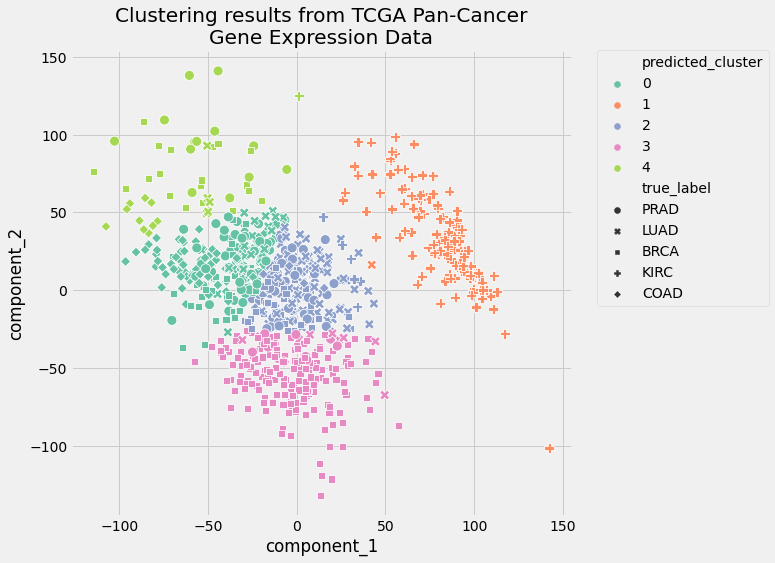

In [28]:
y_predict = kmeans.predict(X)

print('silhouette score: ', silhouette_score(X, y_predict))
print('adjusted rand score: ', adjusted_rand_score(y, y_predict))

pcadf = pd.DataFrame(X, columns=["component_1", "component_2"])

pcadf["predicted_cluster"] = y_predict
pcadf["true_label"] = label_encoder.inverse_transform(y)

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
    "component_1",
    "component_2",
    s=100,
    data=pcadf,
    hue="predicted_cluster",
    style="true_label",
    palette="Set2",
)

scat.set_title(
    "Clustering results from TCGA Pan-Cancer\nGene Expression Data"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()

# **Sources:**

1.   https://realpython.com/k-means-clustering-python/

2.   https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq

3.   https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

4.   https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

5.   https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

6.   https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html

